# K-means clustering
In the below code, we will use the K-mean clustering algorithm to cluster colours of an image. We will look for a proper number of clusters in order to reduce the number of the image's colours and to simplify it.

In [14]:
%config InlineBackend.figure_formats = ['retina']
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np, pandas as pd, seaborn as sns
from sklearn.preprocessing import scale
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

### Loading the photo, data exploration and cleaning

(-0.5, 499.5, 374.5, -0.5)

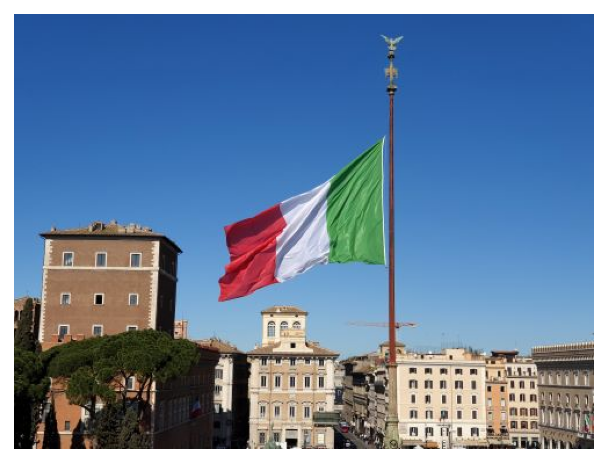

In [15]:
photo = plt.imread('bandiera_small.jpg')
plt.imshow(photo)
plt.axis('off')

Below, we create a function which we will use to get the details of the image and preprocess it adequately.

In [16]:
def preprocess_image(img):
    array_shape = img.shape
    px_num = array_shape[0] * array_shape[1]
    reshaped = img.reshape(px_num, 3)
    return array_shape, px_num, reshaped

In [17]:
initial_shape, px_num, photo_reshaped = preprocess_image(photo)
initial_shape, px_num

((375, 500, 3), 187500)

In [18]:
photo[:3]

array([[[ 31,  81, 154],
        [ 31,  81, 154],
        [ 31,  81, 154],
        ...,
        [ 33,  83, 152],
        [ 33,  83, 152],
        [ 33,  83, 152]],

       [[ 31,  81, 154],
        [ 31,  81, 154],
        [ 31,  81, 154],
        ...,
        [ 33,  83, 152],
        [ 33,  83, 152],
        [ 33,  83, 152]],

       [[ 31,  81, 154],
        [ 31,  81, 154],
        [ 32,  82, 155],
        ...,
        [ 34,  84, 155],
        [ 34,  84, 155],
        [ 34,  84, 155]]], dtype=uint8)

The dimentions of our image is 375x500 pixels, which means that it is composed of 187500 pixels. The image is stored as a numpy 3-dimensional array.

Each inner array represents one pixel and it contains three numbers (RGB values), which represent the pixel's colour.

The function returns the reshaped array (as the third item) so that now each row represtents one pixel.

In [19]:
photo_reshaped[:3]

array([[ 31,  81, 154],
       [ 31,  81, 154],
       [ 31,  81, 154]], dtype=uint8)

### K-means clustering with various number of clusters
We create a function that takes as the parameters the initial array with the picture's data (pixels colours) and the number of clusters we want to have. It will perform the K-Means algorithm and return a simplified image (with a reduced number of colours) along with the corresponding inertia.

In [20]:
def cluster_img(img, k_num):
    flatten_img = preprocess_image(img)[2]
    flatten_img_copy = flatten_img.copy()
    
    kmeans = KMeans(n_clusters=k_num).fit(flatten_img)
    
    for label in np.unique(kmeans.labels_):
        flatten_img_copy[kmeans.labels_==label, :] = kmeans.cluster_centers_[label]
    
    img_simplified = flatten_img_copy.reshape(img.shape)
    return img_simplified, kmeans.inertia_

We run the above function with different k_num parameter (number of clusters) in order to see what number will work best for us, i.e. which one will result in a simplified number of colours but will not exaggeratedly reduce the image quality from the point of view of the details on the picture.

We try number of clusters ranging from 2 un to 20 (included). 

In [21]:
clusters_num = list(range(2,22,2))
simplified_photos = []
inertia = []

for num in clusters_num:
    pho, ine = cluster_img(photo, num)
    simplified_photos.append(pho)
    inertia.append(ine) 

Firstly, we want to see the inertia for different number of clusters (clusters_num) and determine its optimal value. To do so, we use two arrays: clusters_num and inertia that we obtained in the previous step.

Text(0, 0.5, 'Inertia')

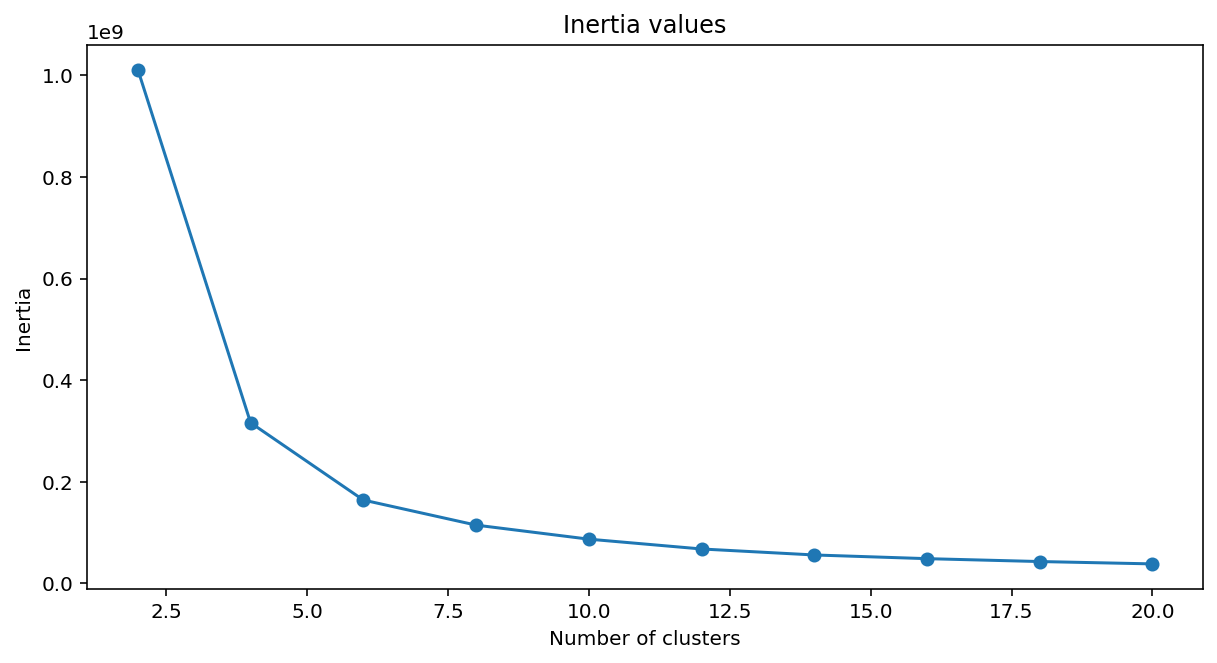

In [22]:
plt.figure(figsize=[10,5])
plt.plot(clusters_num, inertia)
plt.scatter(clusters_num, inertia)
plt.title('Inertia values')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Firstly, we define the elbow - the point that "breaks" the inertia line; the break point stands for the point after which the inertia begin to decrease linearly. (The lower value of inertia, the bigger number of clusters and the image is more detailed).

We know that the ideal number of clusters tends to fall at the elbow and in our case this value will be 6 with inertia close to the value of 0.2. In order to verify this result, we will plot the pictures and observe how they change with successive number of clusters.

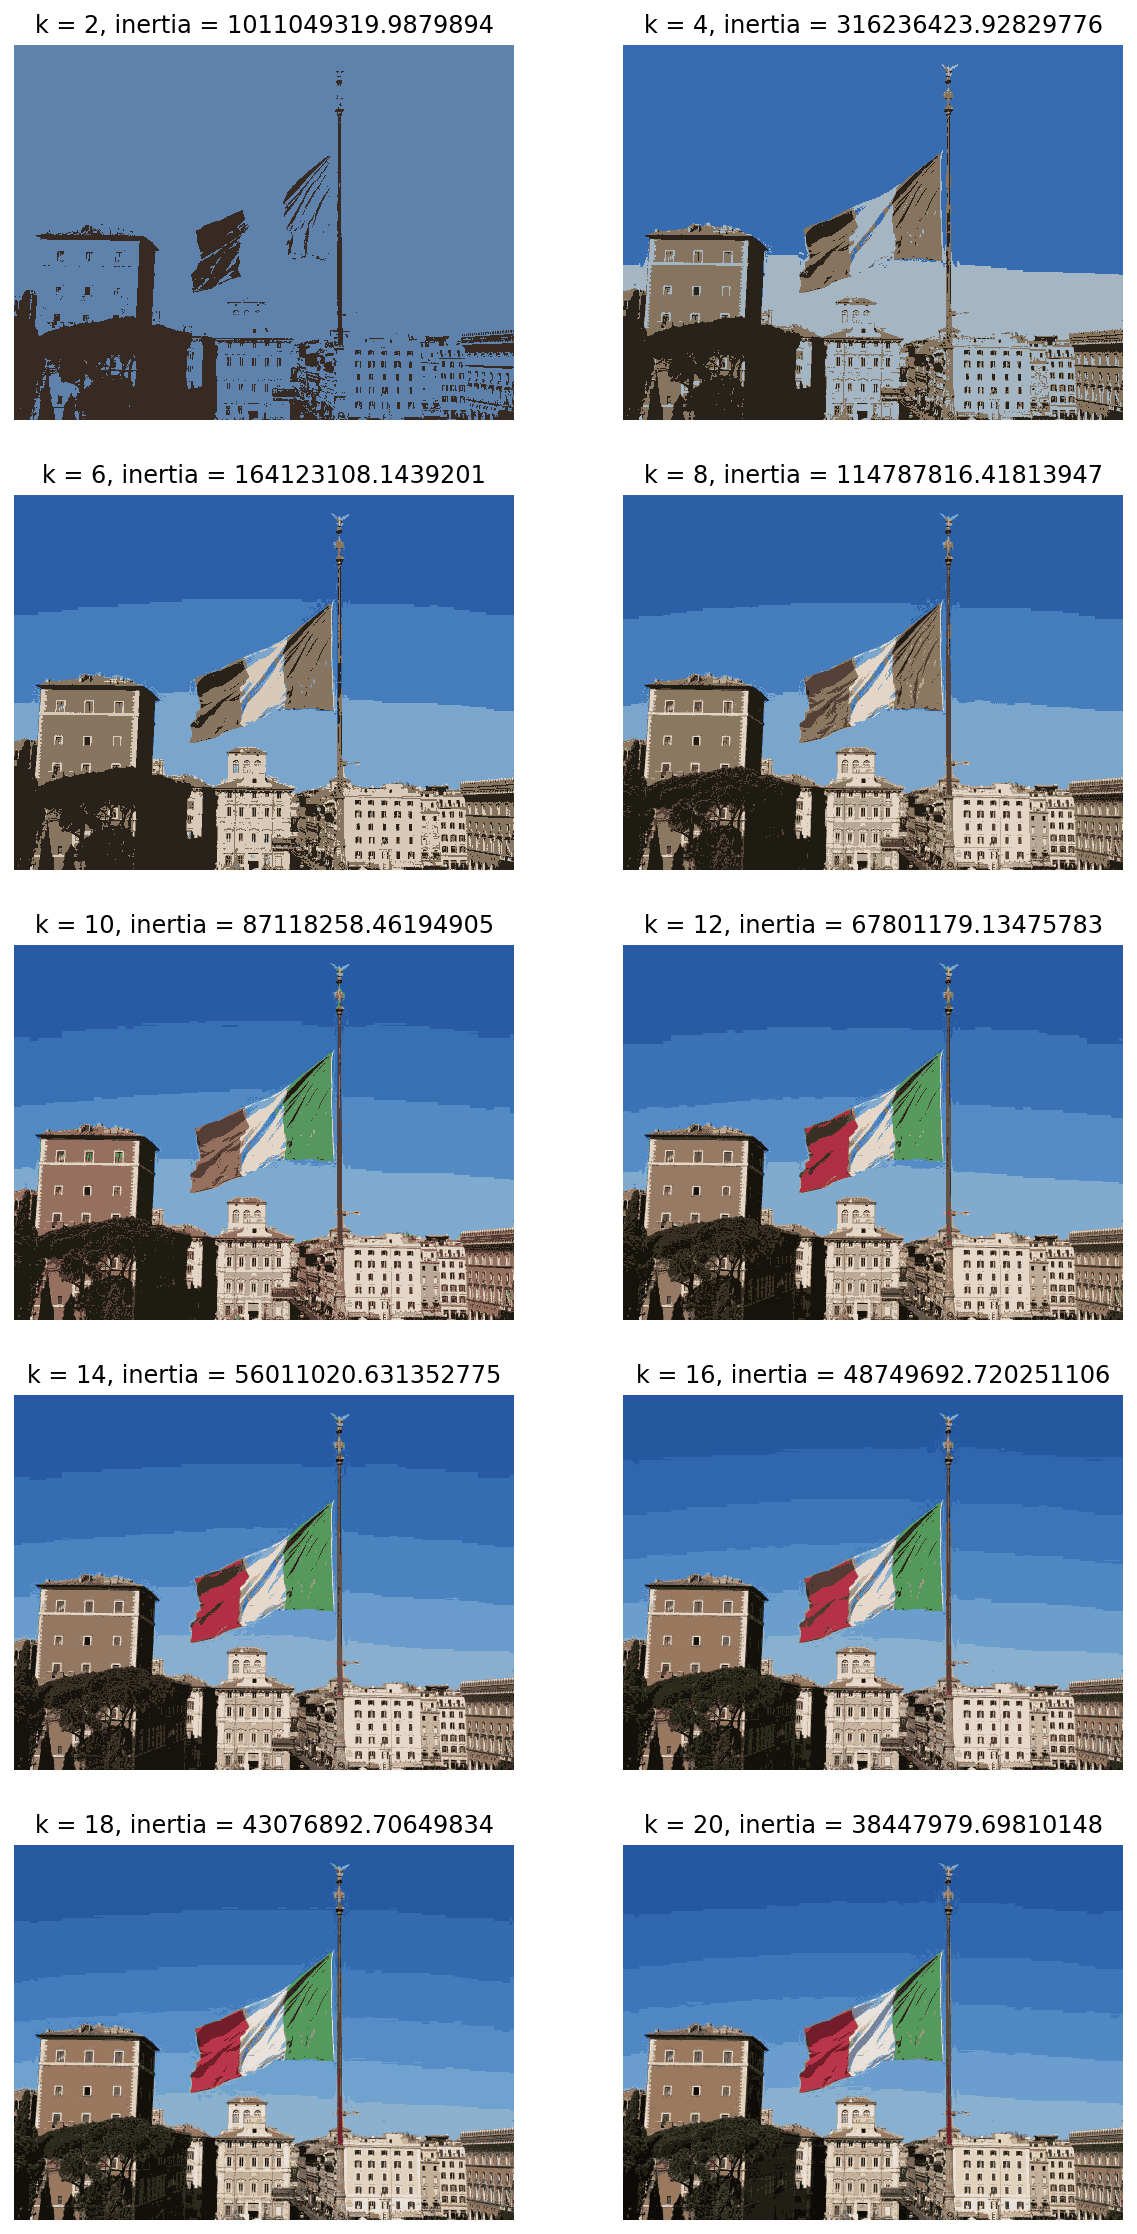

In [23]:
plt.figure(figsize=[10,20])
for i in range(len(clusters_num)):
    plt.subplot(5,2,i+1)
    plt.imshow(simplified_photos[i])
    plt.title(f'k = {clusters_num[i]}, inertia = {inertia[i]}')
    plt.axis('off');

### Recapitulation, key findings and possible next steps
We can notice that starting from inertia equal to 6, the shapes on the image begin to be easily distinguishable, but the colours are not clearly visible. Because of this, we have to adjust our primary evaluation of clusters_num=6 as our best choice and change it to clusters_num=10 as with 10 clusters our image do not lose any principal characteristics (shapes and colours and visible). In case we would need a more detailed picture, we can add more clusters as it will result in more colours on our photo and more details as well.